# 02. Neural network classicication with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as options ).

* Book version of the course: https://www.learnpytorch.io/02_pytorch_classification/
* All other resources - https://github.com/mrdbourke/pytorch-deep-learning
* Stuck? ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

## 1. Make classification data and get it ready 

In [39]:
import sklearn

In [40]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create_circles
X,y = make_circles(n_samples, noise=0.03, random_state = 42)

In [41]:
len(X), len(y)

(1000, 1000)

In [42]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"First 5 samples of y: \n {y[:5]}")

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


In [43]:
# Make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


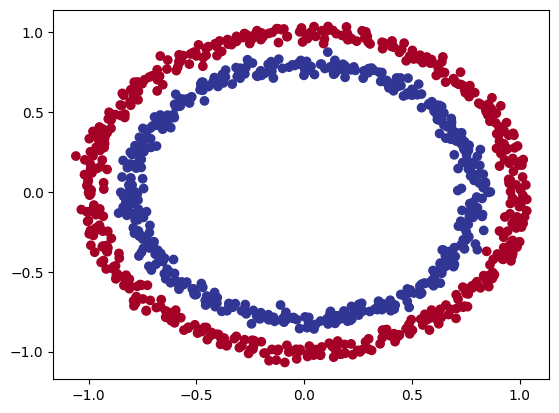

In [44]:
# Visaulize, visualize, visualize 
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Note:** The data were working with is referrd to as a toy dataset, a dataset that is small enough to experiment but still siziable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [45]:
X.shape, y.shape

((1000, 2), (1000,))

In [46]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [47]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


 ### 1.2 Turn data into tensors and create a train and test split

In [48]:
import torch
torch.__version__

'2.0.1+cpu'

In [49]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [50]:
#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [51]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [52]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
len(X_train), len(X_test), len(y_train), len(y_test), n_samples

(800, 200, 800, 200, 1000)

## 2. Building a model

Lets build a model to classify our blue and red dots

To do so we want to :
1. Setup device agostic code so our code will run on an acclerator
2. Construct a model (by subclassing 'nn.Module')
3. Define a loss function and an optimizer 
4. Create a training and test loop 


In [54]:
# Import Pytorch and nn
import torch
from torch import nn

#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [55]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, lets create a model that:

1. Subclasses 'nn.Module'
2. Create two 'nn.Linear()' layers that are capable of handling the shapes of our data 
3. Define a 'forward()' method 
4. Instantiate an instance of our model class and send it to the target'device'

In [56]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handelling the shapes of our data
        self.layer_1 = nn.Linear(in_features = 2, out_features= 5)
        self.layer_2 = nn.Linear(in_features=5, out_features= 1)

    # 3. Define a forward method
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2
    
# 4. Instantiate an instance of our model class and send it to our target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [57]:
device

'cpu'

A Playground to play around with neural network classification data : https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.47363&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [58]:
# Lets replicate the model using nn.Sequential()
model_0 = nn.Sequential( 
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [59]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [60]:
# Make predictions 
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n {untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
 tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

It is problem specific. 

For regression we might want to use MAE or MSE 

For classification we need binary cross entropy or categorical cross entropy

to understand binary cross entropy : https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

And for optimizers two of the most common are SGD and Adam, however PyTorch has many built in options.

* For the loss function we're going to use 'torch.nn.BCEWithLogitsLoss()'


In [61]:
# Setup the loss function 
# loss_fn = nn.BCELoss() #requires inputs to have gone through the sigmoid activation function prior to the input of BCE loss
loss_fn = nn.BCEWithLogitsLoss() # had the sigmoid activation function built in 

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [62]:
# calculate accuracy - out of 100 what percentage does our model get right?
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) *100
    return(acc)

## 3. Training the model

### 3.1 Going from raw logits -> prediction probability -> prediction labels

Our model outputs are going to be raw **Logits**

We can convert these **Logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary cross entropy and sofrmax for multiclass classification )

Then we can convert our models prediction probabilities to **prediction labels** by either rounding them or taking the 'argmax()'

In [63]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [64]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [65]:
# Use the sigmoid activation function on our model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

For our prediction probability values, we need to perform a range style rounding on them:
* 'y_pred_probs' >= 0.5 , 'y=1' (class 1)
* 'y_pred_probs' <0.5, 'y=0' (class 0)

In [66]:
# Find the prediction labels
y_pred = torch.round(y_pred_probs)

#In full - one line 
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_pred.squeeze(),y_pred_labels.squeeze()))

# to get rid of extra dimension
y_pred.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [67]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [68]:
torch.manual_seed(42)

# Set the number of epochs
epochs =100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    # Training
    model_0.train()
    
    #Forward_pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred_probs -> pred labels
    
    #calculate loss/accuracy
    loss = loss_fn(y_logits,y_train)    #nn.BCEWithLogitLoss expects raw logits as inputs 
    # loss = loss_fn(torch.sigmoid(y_logits),y_train)  #nn.BCELoss expects prediction probabiity as input
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Loss backward
    loss.backward()
    
    #Optimizer step (gradient decent)
    optimizer.step
    
    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        #calcu;ate test loss
        test_loss = loss_fn(test_logits,y_test)
        
        test_acc = accuracy_fn(y_true=y_test, y_pred = test_pred)
    
    if epoch%10==0:
        print(f"Epoch: {epoch} | loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | loss: 0.69796, Acc: 51.88 | Test loss: 0.69462, Test acc: 57.50%
Epoch: 10 | loss: 0.69796, Acc: 51.88 | Test loss: 0.69462, Test acc: 57.50%
Epoch: 20 | loss: 0.69796, Acc: 51.88 | Test loss: 0.69462, Test acc: 57.50%
Epoch: 30 | loss: 0.69796, Acc: 51.88 | Test loss: 0.69462, Test acc: 57.50%
Epoch: 40 | loss: 0.69796, Acc: 51.88 | Test loss: 0.69462, Test acc: 57.50%
Epoch: 50 | loss: 0.69796, Acc: 51.88 | Test loss: 0.69462, Test acc: 57.50%
Epoch: 60 | loss: 0.69796, Acc: 51.88 | Test loss: 0.69462, Test acc: 57.50%
Epoch: 70 | loss: 0.69796, Acc: 51.88 | Test loss: 0.69462, Test acc: 57.50%
Epoch: 80 | loss: 0.69796, Acc: 51.88 | Test loss: 0.69462, Test acc: 57.50%
Epoch: 90 | loss: 0.69796, Acc: 51.88 | Test loss: 0.69462, Test acc: 57.50%


## 4. Make Predictions and evaluate the model

From the metrics it looks like our model isnt learning anything

So to inspect it lets make some predictions and make them visual.

To do so, were going to import a function called 'plot_decision_boundary()' - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb


In [69]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


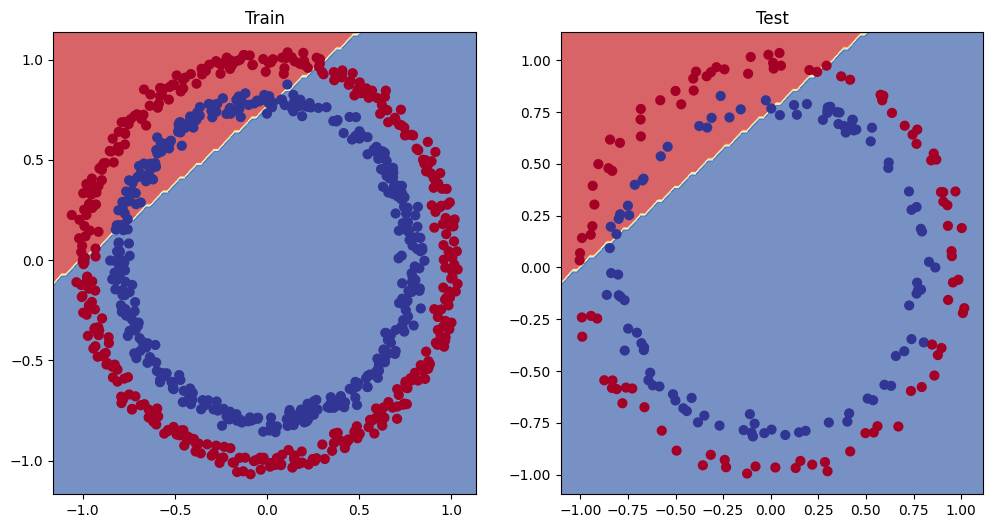

In [70]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from model perspective)

* Add more layers
* Add more hidden units
* Fitting for longer (more epochs)
* Changing the activation functions
* Change the learning rate
* Change the loss function
* Use transfer learning

These options are all from a models perspective, beacuse they deal directly with the model, rather than the data.

And beacuse these options are all values we (machine learning engineers and data scientists) can change, they are refferred as **hyperparameters**.

Lets try and improve our model by :
* Adding more hidden unist: 5-> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs 100 -> 1000


In [74]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features = 10, out_features=10)
        self.layer_3 = nn.Linear(in_features= 10,out_features= 1)

    def forward(self,x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))
        # this way of writing operations leverages speedups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [75]:
#Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.SGD(parms = model_1.parameters(), lr = 0.1)

In [ ]:
# Write a training and evaluation loop for model_1